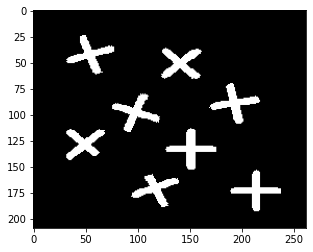

In [62]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply4Connectivity(filename):
  img = Image.open(filename)
  img_array = np.array(img)
  img_labels = np.zeros(img_array.shape)
  new_img_array = np.zeros(img_array.shape)
  labels = dict()
  currentMaxLabel = 0

  for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
      if img_array[i, j] == 255:
        if i != 0 and j != 0:
          if img_labels[i-1, j] == img_labels[i, j-1] and img_labels[i, j-1] != 0: # Both labels same
            img_labels[i,j] = img_labels[i, j-1] # Both left and top same
          elif img_labels[i-1, j] != img_labels[i, j-1]: # Both labels diff
            if img_labels[i-1, j] == 0:
              img_labels[i,j] = img_labels[i, j-1] # left pixel is white, top is black
            elif img_labels[i, j-1] == 0:
              img_labels[i, j] = img_labels[i-1, j] # top pixel is white, left is black
            else: # Both pixels are white having diff labels
              neighbour_labels = [img_labels[i-1, j], img_labels[i, j-1]]
              img_labels[i, j] = min(neighbour_labels)
              if neighbour_labels.index(min(neighbour_labels)) == 0:
                # Top label is less
                labels[int(img_labels[i, j-1])] = img_labels[i-1, j]
              else:
                labels[int(img_labels[i-1, j])] = img_labels[i, j-1]
          elif img_labels[i-1, j] == 0 and img_labels[i, j-1] == 0: # Both pixels black
            img_labels[i, j] = currentMaxLabel + 1 # Assigning new label
            currentMaxLabel += 1
            labels[int(currentMaxLabel)] = currentMaxLabel

  for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
      if img_array[i, j] == 255:
        img_labels[i, j] = labels[int(img_labels[i, j])]
        new_img_array[i, j] = 255
    
  new_g_img = Image.fromarray(new_img_array)
  new_img = Image.new("RGB", img.size)
  new_img.paste(new_g_img)
  new_img.save("result.png")
  return new_img


img = apply4Connectivity("cc.png")

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.imshow(img, cmap='gist_earth')
plt.show()
